In [1]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

## Amsterdam Airbnb Data Investigation
In this analysis ,I use the Airbnb data for Amsterdam to find answres to the following business questions
1. What is number of new listings posted on Airbnb for Amsterdam, on a year to year basis ?
2. What is the distribution of prices in Amsterdam Airbnb listings ?
3. Which features contibute the most in predicting prices of listings ?

The data is a complex one and a much more detailed analysis is possible. But for the purposes of the Udacity project, I am keeping the analysis limited and simple.

In [2]:
# import data

listings_df = pd.read_csv('listings.csv')
listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.365755,4.941419,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$100.00,$50.00,1,$20.00,3,15,today,t,17,44,44,44,2018-12-06,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,NaN,"From Central Station, walk towards the busstop...",You will have the entire house to yourself.,We will meet you in person for check in whenev...,"Our house comes with our very sweet, but old (...",NaN,NaN,https://a0.muscache.com/im/pictures/88955424/4...,NaN,3806,https://www.airbnb.com/users/show/3806,Maartje,2008-10-24,"Amsterdam, Noord-Holland, The Netherlands",I am a freelance radio producer and journalist...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/3806/profile_...,https://a0.muscache.com/im/users/3806/profile_...,Spaarndammer en Zeeheldenbuurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, Noord-Holland, Netherlands",Spaarndammer en Zeeheldenbuurt,Westerpark,NaN,Amsterdam,Noord-Holland,1013 XE,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.390225,4.873924,t,Apartment,Entire home/apt,5,1.

In [3]:
# size of listings dataframe
print(f"Number of rows in listings dataframe :{listings_df.shape[0]}")
print(f"Number of columns in listings dataframe:{listings_df.shape[1]}")

Number of rows in listings dataframe :20030
Number of columns in listings dataframe:96


In [4]:
# drop columns with more than 50% mising values
null_count = listings_df.isnull().sum()
null_per = null_count/listings_df.shape[0] * 100
drop_index = list(null_per[null_per>50].index)
drop_index

['notes',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license']

In [5]:
listings_df= listings_df.drop(columns=drop_index, axis=1)
listings_df.shape[1]

86

In [6]:
# drop all url columns because they won't help in our analysis
url_cols = ['listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url']
listings_df = listings_df.drop(columns=url_cols, axis=1)
listings_df.shape[1]

81

In [7]:
# exploring columns containing boolean values
bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability',
             'requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture',
             'require_guest_phone_verification']

# The boolean features are encoded as t for TRUE and f for FALSE
# I encode t : 1 and f : 0
listings_df = listings_df.replace({'t':1, 'f':0})

Some columns are not useful, are redundant and are related to collection of data. Morever ,there are some columns which require Natural Language Processing . But I have decided to keep my analysis simple and so decided to drop them. The other columns .I felt these were not important for our analysis and so dropped them.

In [8]:
to_drop = ['scrape_id','last_scraped','name','summary','space','description','experiences_offered','neighborhood_overview',
          'transit','access','interaction','house_rules','host_id','host_name','host_about','host_neighbourhood',
          'street','neighbourhood_cleansed','state','zipcode','market','smart_location','country_code','country',
          'latitude','longitude','is_location_exact','calendar_updated','calendar_last_scraped',
          'first_review','last_review','jurisdiction_names','instant_bookable']
listings_df.drop(columns=to_drop, axis=1, inplace=True)

In [9]:
# change data type of host_since column
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])

# creating a column showing number of years listed
listings_df['num_years_listed'] = pd.datetime.now().year - listings_df['host_since'].dt.year
listings_df['year'] = listings_df['host_since'].dt.year
listings_df.head()

,id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,city,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,num_years_listed,year
0,2818,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100%,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,0.0,Indische Buurt,Amsterdam,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",$59.00,$100.00,$50.00,1,$20.00,3,15,1,17,44,44,44,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,strict_14_with_grace_period,0,0,1,2.10,11.0,2008.0
1,3209,2008-10-24,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100%,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",1.0,1.0,Spaarndammer en Zeeheldenbuurt,Amsterdam,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",$160.00,$300.00,$40.00,2,$15.00,4,20,1,0,0,0,47,42,96.0,10.0,9.0,10.0,10.0,9.0,9.0,0,0,moderate,0,0,1,1.03,11.0,2008.0
2,20168,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",within a few hours,100%,0.0,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,0.0,Grachtengordel,Amsterdam,Townhouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",$80.00,NaN,NaN,2,$0.00,1,1000,1,0,7,24,198,233,87.0,9.0,10.0,9.0,9.0,10.0,9.0,0,0,strict_14_with_grace_period,0,0,2,2.18,10.0,2009.0
3,25428,2009-11-20,"New York, New York, United States",within a few hours,100%,0.0,2.0,2.0,"['email', 'phone', 'reviews']",1.0,0.0,Grachtengordel,Amsterdam,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",$125.00,$300.00,$40.00,2,$10.00,14,60,1,2,32,44,141,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict_14_with_grace_period,0,0,2,0.09,10.0,2009.0
4,27886,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100%,1.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",1.0,1.0,Westelijke Eilanden,Amsterdam,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",$150.00,$0.00,$0.00,1,$0.00,2,730,1,16,37,54,199,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict_14_with_grace_period,0,0,1,2.03,9.0,2010.0


#### 1. What is number of new listings posted on Airbnb for Amsterdam, on a year to year basis ?

Text(0,0.5,'Number of listings')

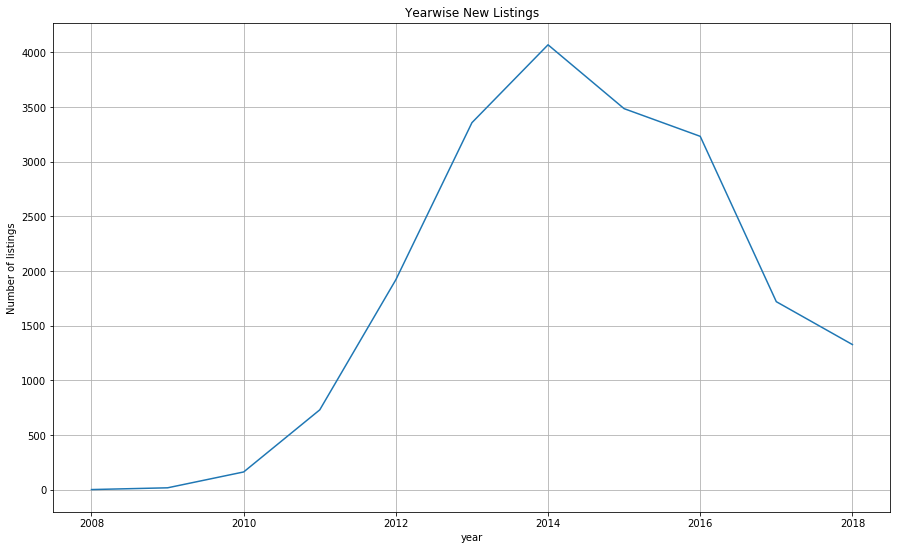

In [10]:
# Exploring new listings posted on Airbnb yearwise

listings_df.groupby('year')["id"].count().plot(kind='line', figsize=(15,9), grid=True,title='Yearwise New Listings')
plt.ylabel('Number of listings')

We can see from above that the number of new listings on Airbnb for Amsterdam, saw a sharp increase from 2010 to 2014. It was at its peak in 2014. Thereafter, the number of new listings has witnessed a sharp decline. This is an important business insight and answers one of the business questions ,we set out to explore from the data.

In [11]:
# clean all price columns
cols_price = ['security_deposit','price','cleaning_fee','extra_people']

def clean_price(df, columns_price=cols_price):
    '''
    Cleans all price columns of given dataframe, removes $ symbol and comma 
    
    Parameters:
    df : Dataframe
    columns_price : set to default price columns for the dataframe being used
    
    Returns:
    None
    
    '''
    
    for col in cols_price:
        df[col] = df[col].str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)

In [12]:
clean_price(listings_df)

In [13]:
# clean column having % symbol
# Only 1 column has % symbol currently

listings_df['host_response_rate'] = listings_df['host_response_rate'].str.replace('%','',regex=False).astype('float')/100

Few columns have multiple categories and are formatted in a special way. We need to be a more creative. they need to encoded accordingly. Using pandas.get_dummies method will help us in encoding the rest columns. 

In [14]:
multi_encode_cols = ['amenities','host_verifications']
categorical = ['host_response_time','bed_type','room_type','property_type','cancellation_policy']

In [15]:
listings_df = pd.get_dummies(listings_df, columns=categorical)

In [16]:
# exploring the special formatted columns
listings_df['amenities'].head()

0    {Internet,Wifi,"Paid parking off premises","Bu...
1    {Internet,Wifi,Kitchen,"Paid parking off premi...
2    {TV,Internet,Wifi,"Paid parking off premises",...
3    {TV,"Cable TV",Internet,Wifi,Kitchen,Elevator,...
4    {TV,Internet,Wifi,Breakfast,Heating,"Smoke det...
Name: amenities, dtype: object

In [17]:
amenities_enc = listings_df['amenities'].str.strip('{}').str.replace('"','').str.split(',').str.join('|').str.get_dummies()

In [18]:
listings_df['host_verifications'].head()

0    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1               ['email', 'phone', 'reviews', 'jumio']
2    ['email', 'phone', 'reviews', 'jumio', 'offlin...
3                        ['email', 'phone', 'reviews']
4               ['email', 'phone', 'reviews', 'jumio']
Name: host_verifications, dtype: object

In [19]:
host_vec_enc = listings_df['host_verifications'].str.strip('[]').str.replace("'","").str.split(",").str.join('|').str.get_dummies()

In [20]:
# concatenate both
listings_df = pd.concat([listings_df, amenities_enc], axis=1)
listings_df = pd.concat([listings_df, host_vec_enc], axis=1)

In [21]:
# remove original columns
listings_df = listings_df.drop(columns=multi_encode_cols, axis=1)

In [22]:
# removing columns which will not be required for modeling

listings_df.drop(columns=['host_location','neighbourhood','city','host_since','id'], inplace=True)

In [23]:
# Checking for null values
listings_df.isnull().sum()[listings_df.isnull().sum()>0]

host_response_rate             9483
host_is_superhost                 4
host_listings_count               4
host_total_listings_count         4
host_has_profile_pic              4
host_identity_verified            4
bathrooms                        10
bedrooms                          8
beds                              7
security_deposit               6166
cleaning_fee                   3629
review_scores_rating           2639
review_scores_accuracy         2649
review_scores_cleanliness      2647
review_scores_checkin          2661
review_scores_communication    2652
review_scores_location         2660
review_scores_value            2659
reviews_per_month              2406
num_years_listed                  4
year                              4
dtype: int64

Looks like we are left with quite a few NA values. For the way that we've encoded these values I think that filling 0 is ok for all of them:

For host_response_time 0 is never respond
security_deposit/cleaning_fee 0 means no deposit or fee
review related - 0 is a low score but is ok for no reviews in this category

In [24]:
# Fill the missing values with 0
listings_df.fillna(0, inplace=True)

In [25]:
# checking for any nulls
listings_df.isnull().sum()[listings_df.isnull().sum()>0]

Series([], dtype: int64)

#### 2. What is the distribution of prices in Amsterdam Airbnb listings ?


Text(0,0.5,'Number of listings')

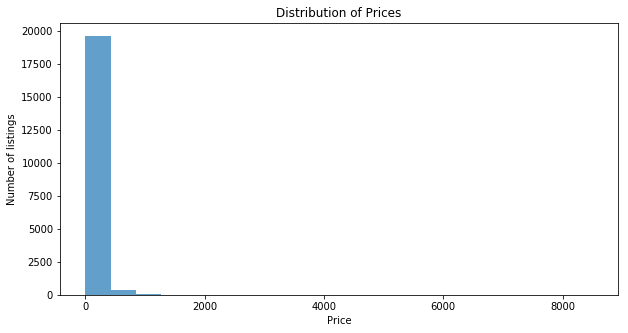

In [26]:
listings_df.price.plot.hist(bins=20, alpha=0.7, title='Distribution of Prices', figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Number of listings')

We can observe from above plot ,that majority of lsiting price are below $1000. So, I zoom in further to get a more clear picture.

Text(0,0.5,'Number of listings')

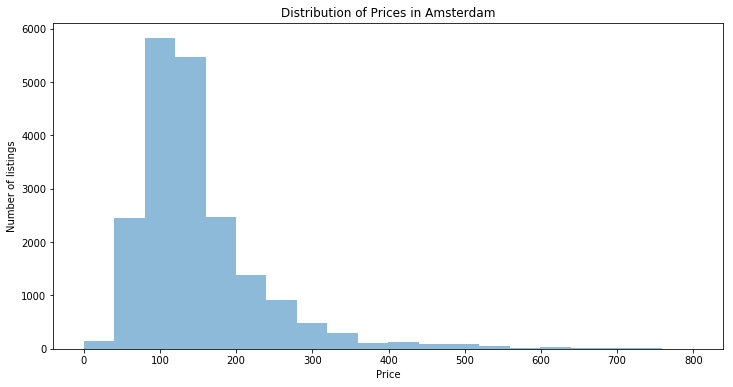

In [27]:
listings_df.price[listings_df.price<800].plot.hist(bins=20, alpha=0.5, title ='Distribution of Prices in Amsterdam',\
                                                  figsize=(12,6))
plt.xlabel('Price')
plt.ylabel('Number of listings')

From this plot, it becomes very clear that the majority of lisitngs are below $400.

### Modeling

We will use a decision tree regressor. Thus, we don't perform feature scaling. Using any other model would require us to perform feature scaling.

In [28]:
# import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Create X(feature) and Y(label: price)
X = listings_df.drop('price', axis=1)
y = listings_df['price']

# Split our data into train and test groups
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


In [29]:
# Initialise model using some parameters

model = DecisionTreeRegressor(max_depth=9, min_samples_split=15, min_samples_leaf=8)

In [30]:
# fit the model

model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
# score on training set
model.score(X_train, y_train)

0.3230635164682769

In [32]:
# score on test set
model.score(X_test, y_test)

0.14051945166505087

The score is not very good but some variance can still be explained. Next, we will find which features contributed most in predicting price of listings.

In [33]:
important_features = pd.concat((pd.Series(X.columns), pd.Series(model.feature_importances_)), axis=1)
important_features.columns = ['Feature','Importance']
df_important_feat = important_features.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [34]:
# find top 25 features
df_important_feat.head(25)

,Feature,Importance
0,accommodates,0.324839
1,availability_365,0.152509
2,Iron,0.125276
3,maximum_nights,0.051247
4,extra_people,0.035540
5,bathrooms,0.035009
6,availability_60,0.033020
7,Safety card,0.029956
8,cleaning_fee,0.027622
9,room_type_Entire home/apt,0.026156


#### 3. Which features contibute the most in predicting prices of listings ?

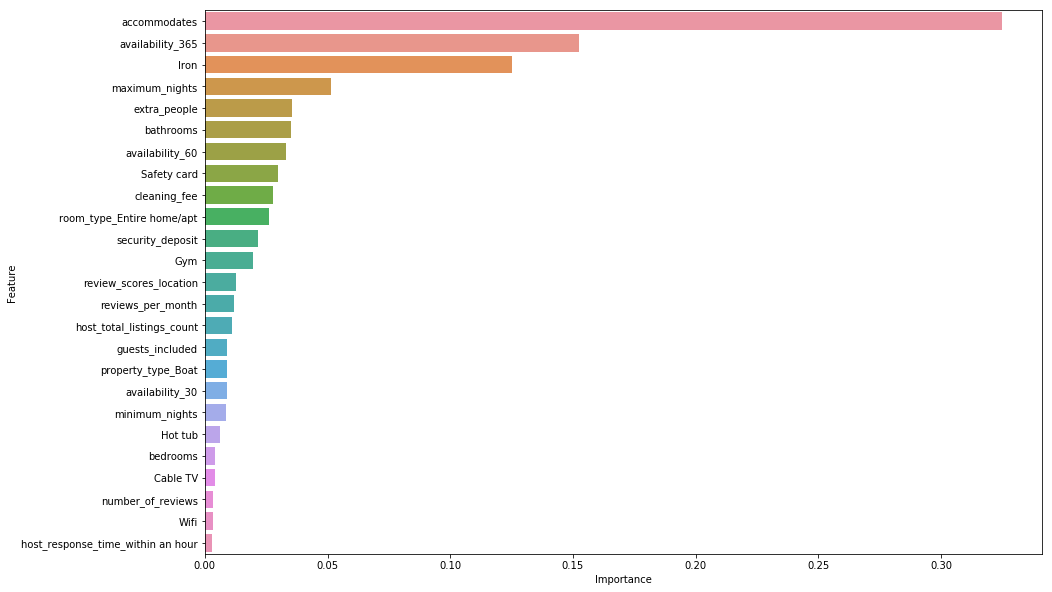

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(x='Importance',
            y='Feature',
            data = df_important_feat.head(25))

## Conclusion
I will revisit the questions that I set out to answer through this analysis
1. What is number of new listings posted on Airbnb for Amsterdam, on a year to year basis ?
  - Using the plot drawn above, we can conclude that the number of new listings saw a sharp increase between 2008 -2014 period.   - Therafter, there has been a declining trend in number of new listings.
2. What is the distribution of prices in Amsterdam Airbnb listings ?
  - The price distribution clearly shows that the majority of listings are below $400
3. Which features contibute the most in predicting prices of listings ?
  - accomodates and availability are contributing the most in predicting prices

It is very clear that this dataset is very detailed and exhaustive . I have barely scratched the surface through this analysis.
To improve upon this analysis, we can perform sentiment analysis of reviews , location analysis of listings and a ton of other things. But, I have kept my analysis simple for the purposes of this project. Looking forward to improving upon it later.